###  Read and Visualize the data

In [1]:
#importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# read the dataset
df = pd.read_csv('Country-data.csv')
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [3]:
#checking the number of rows and columns
df.shape

(167, 10)

In [4]:
# to check the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


As we see that there are no missing values in all the features so no need to impute any feature

In [5]:
# describing the dataframe
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [6]:
# converting from the percentage to their original values with respect to 'gdpp' values
df['exports'] = (df['exports']*df['gdpp'])/100
df['health'] = (df['health']*df['gdpp'])/100
df['imports'] = (df['imports']*df['gdpp'])/100

In [7]:
# checking the top 5 row values of the dataframe after the updations made on the columns exports, health and imports
df.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

As we have seen, there is no missig data using the command `df.info`, So no need to do any imputtion for any feature

### Prepare the data for modelling

#### EDA

In [8]:
# checking the column names
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [9]:
# Assigning the column names to the variable features
features = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

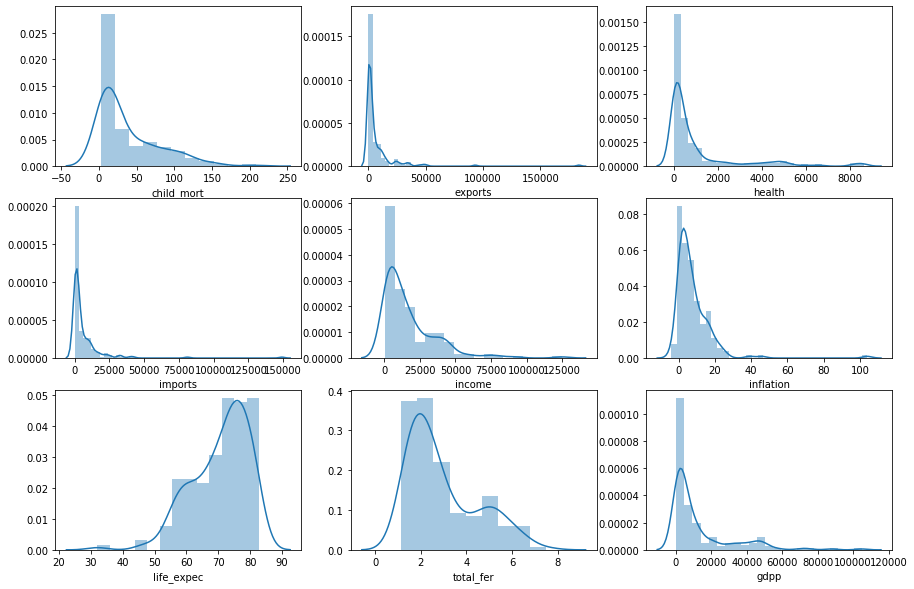

In [10]:
# Plotting the distplot for the considered featues
plt.figure(figsize=[15,10])
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])
    

#### Univariate analysis

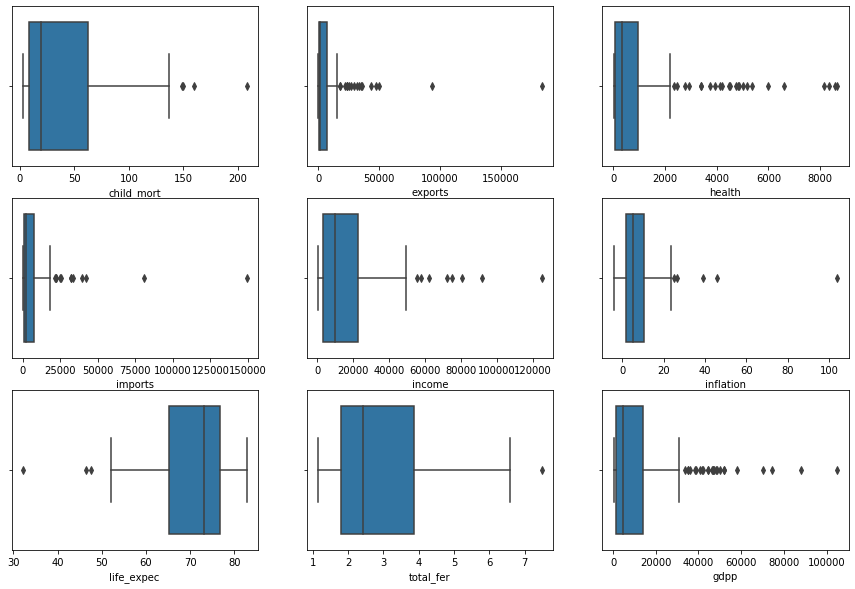

In [11]:
# plotting the boxplot for the outlier detection
plt.figure(figsize=[15,10])
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])

#### Bivariate analysis

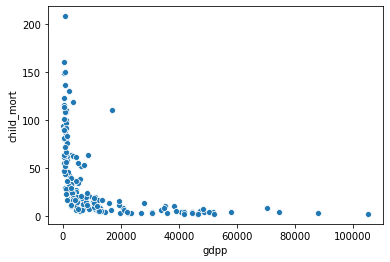

In [12]:
# gdpp vs child_mort, As GDP per capita increases Death of children under 5 years of age per 1000 live births is decreasing
sns.scatterplot(x='gdpp',y='child_mort',data=df)

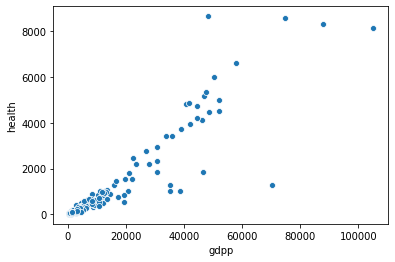

In [13]:
# gdpp vs health, As GDP per capita increases total health spending per capita is also increasing
sns.scatterplot(x='gdpp',y='health',data=df)

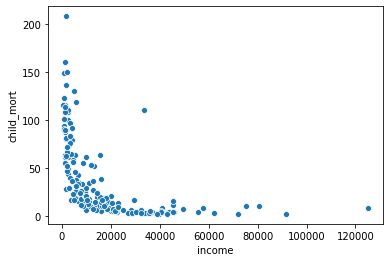

In [14]:
# income vs child_mort, As net income increases there is a downfall in child_mort so they both are inversely proportional
sns.scatterplot(x='income',y='child_mort',data=df)

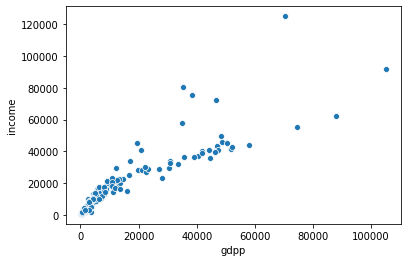

In [15]:
# plotting the scatterplot for gdpp vs income
sns.scatterplot(x='gdpp',y='income',data=df)

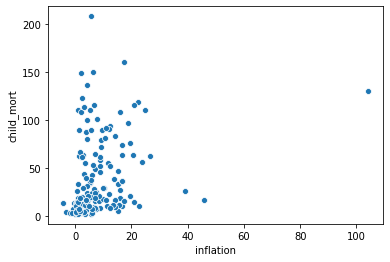

In [16]:
#inflation vs child_mort, As the measurement of the annual growth rate of the Total GDP increases there is a less chances of Death of children under 5 years of age per 1000 live births 
sns.scatterplot(x='inflation',y='child_mort',data=df)

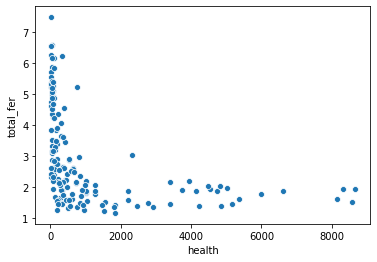

In [17]:
# health vs total_fer, As total health spending per capita increases then the number of children that would be born to each woman if the current age-fertility rates remain the same decreases.
sns.scatterplot(x='health',y='total_fer',data=df)

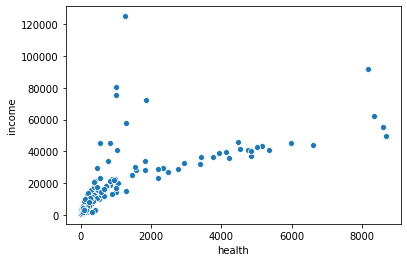

In [18]:
# health vs income, As net income per person is lower total health spending per capita is low and As net income per person is higher total health spending per capita is high
sns.scatterplot(x='health',y='income',data=df)

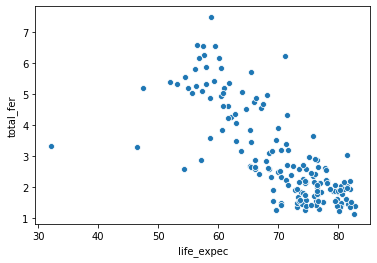

In [19]:
# life_expec vs total_fer
sns.scatterplot(x='life_expec',y='total_fer',data=df)

#### As we see there are some outliers as per the boxplot plotted at univariate analysis, Let us treat them by capping them

In [20]:
# 'exports' outlier treatment, as we can see there are few values in exports feature which are far from the whiskers 

q4 = df['exports'].quantile(0.95)
df['exports'][df['exports']>=q4]=q4

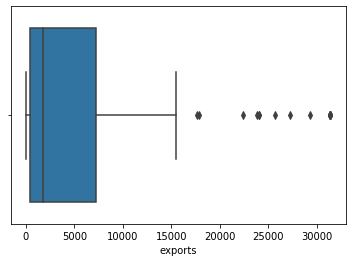

In [21]:
# plotting the boxplot to see the outlliers still exist or not, as we see from the below box plot there is no such outlier which is very far from the whiskers 
sns.boxplot(df['exports'])

In [22]:
# 'health' outlier treatment, we can see some outliers exists we will perform capping for the outliers instead of removal
q4 = df['health'].quantile(0.95)
df['health'][df['health']>=q4]=q4

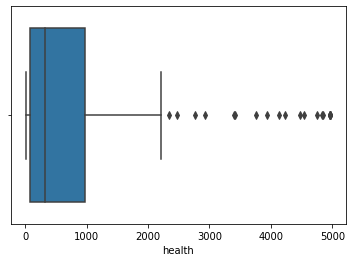

In [23]:
# plotting the boxplot for the health feature and after plotting the box feature we can see there are no such outliers which are very far from the whiskers so will consider this
sns.boxplot(df['health'])

In [24]:
# 'imports' outlier treatment, 'imports' feature has outliers which are very far from the whiskers so wil perform the capping as below
q4 = df['imports'].quantile(0.95)
df['imports'][df['imports']>=q4]=q4

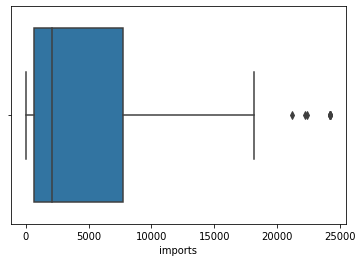

In [25]:
# plotting the box plot after the capping treatment, as we see the boxplot there are outliers but which are considerable
sns.boxplot(df['imports'])

In [26]:
# 'income' outlier treatment, 'income' has some outliers will try to do the capping as below
q4 = df['income'].quantile(0.95)
df['income'][df['income']>=q4]=q4

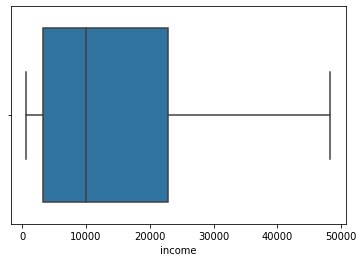

In [27]:
# plotting the box plot after the capping treatment, as we see the boxplot there are no outliers for the 'income' feature
sns.boxplot(df['income'])

In [28]:
# 'inflation' outlier treatment, we see there are few outliers present so will perform capping as below
q4 = df['inflation'].quantile(0.95)
df['inflation'][df['inflation']>=q4]=q4


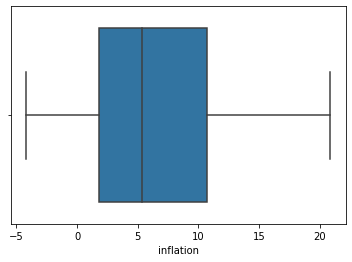

In [29]:
# As per the plot we could remove the outliers by capping as the above step
sns.boxplot(df['inflation'])

In [30]:
# 'total_fer' outlier treatment
q4 = df['total_fer'].quantile(0.99)
df['total_fer'][df['total_fer']>=q4]=q4

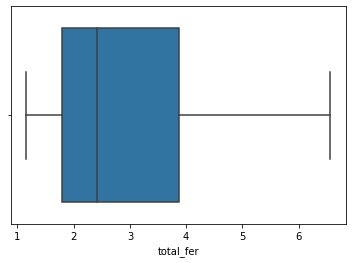

In [31]:
# as per the plot we can see that by capping the values by soft range could remove the outliers
sns.boxplot(df['total_fer'])

In [32]:
# gdpp outlier treatment,
q4 = df['gdpp'].quantile(0.95)
df['gdpp'][df['gdpp']>=q4]=q4

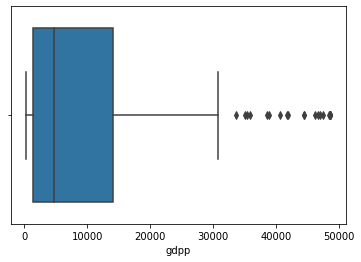

In [33]:
# As per the plot we can see that few values of 'gdpp' still exist after the outier treatment, no need to remove them as we can see them they are near to the whiskers and many points are little closer
sns.boxplot(df['gdpp'])

#### Hopkins check

In [34]:
#Hopkins check
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [35]:
# To find the cluster tendency 
hopkins(df.drop('country',axis=1))

0.8561825437576701

#### Rescaling

In [36]:
# Selecting the columns for the scaling
df_scale = df.drop('country',axis=1)
df_scale.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [37]:
#instantiate the scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#fit_transform
df1 = scaler.fit_transform(df_scale)

# checking the shape
df1.shape

(167, 9)

In [38]:
#Converting to a dataframe
scaled_df = pd.DataFrame(df1)
scaled_df.columns = df_scale.columns
scaled_df.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.426485  0.001728  0.005873  0.010216  0.020994   0.544258    0.475345   
1    0.068160  0.036456  0.051490  0.081973  0.195487   0.346890    0.871795   
2    0.120253  0.054536  0.034955  0.057745  0.257776   0.809809    0.875740   
3    0.566699  0.070039  0.017720  0.062445  0.110967   1.000000    0.552268   
4    0.037488  0.176839  0.145914  0.296406  0.387806   0.225279    0.881657   

   total_fer      gdpp  
0   0.862642  0.006656  
1   0.092360  0.079766  
2   0.321413  0.087414  
3   0.925447  0.068191  
4   0.181026  0.247401

In [39]:
# describing the dataframe to check median,mean, count, quantiles 
scaled_df.describe()

child_mort     exports      health     imports      income   inflation  \
count  167.000000  167.000000  167.000000  167.000000  167.000000  167.000000   
mean     0.173661    0.184235    0.189991    0.212015    0.317312    0.444151   
std      0.196343    0.273389    0.293392    0.276236    0.310127    0.254560   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.027507    0.014213    0.013265    0.026384    0.057591    0.240032   
50%      0.081305    0.056601    0.062388    0.084359    0.196116    0.382775   
75%      0.289679    0.231867    0.194619    0.318427    0.465406    0.596491   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       life_expec   total_fer        gdpp  
count  167.000000  167.000000  167.000000  
mean     0.758495    0.331066    0.243242  
std      0.175408    0.276773    0.313322  
min      0.000000    0.000000    0.000000  
25%      0.654832    0.119144    0.022716  
50%      0.808679    0.232747    0.091548  
75%      0.881657    0.504286    0.285640  
max      1.000000    1.000000    1.000000

### Modelling

#### K-means Clustering
#### Finding the optimal number of clusters

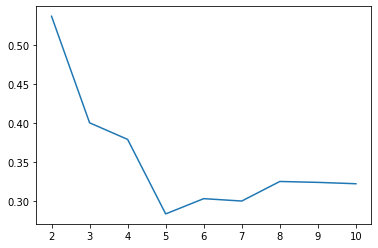

In [40]:
# silhouette analysis

ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(scaled_df)
    ss.append([k, silhouette_score(scaled_df,kmean.labels_)])
temp =pd.DataFrame(ss)
plt.plot(temp[0],temp[1])

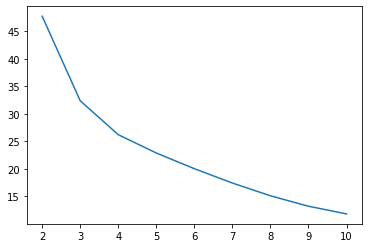

In [41]:
# Elbow curve
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(scaled_df)
    ssd.append([k,kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0],temp[1])

As we can see from the `Elbow curve` and `Silhouette score` curves we can come to the conclusion that we can consider the number of clusters as `3`
`K=3`

In [42]:
# K=3, final number of clusters
kmean = KMeans(n_clusters=3,random_state=50)
kmean.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [43]:
#Creating a Copy of the dataframe 
df_kmean = df.copy()

In [44]:
#Creating a dataframe for labels from kmean.labels_
label = pd.DataFrame(kmean.labels_,columns = ['label'])

In [45]:
# Adding the label column to the df_kmean dataframe
df_kmean = pd.concat([df,label],axis=1)
df_kmean.head()

country  child_mort  exports    health   imports   income  \
0          Afghanistan        90.2    55.30   41.9174   248.297   1610.0   
1              Albania        16.6  1145.20  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.64  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.19  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer   gdpp  label  
0       9.44        56.2       5.82    553      2  
1       4.49        76.3       1.65   4090      1  
2      16.10        76.5       2.89   4460      1  
3      20.87        60.1       6.16   3530      2  
4       1.44        76.8       2.13  12200      1

In [46]:
# Verifying the count of clusters
df_kmean.label.value_counts()

1    84
2    46
0    37
Name: label, dtype: int64

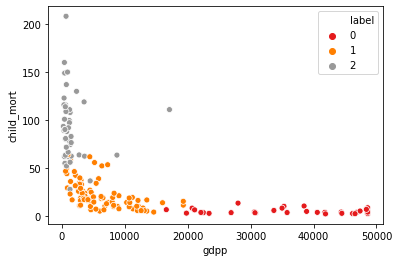

In [47]:
# plot the cluster using the scatter plot to find the distribution of clusters having hue as label column
sns.scatterplot(x='gdpp',y='child_mort',hue='label', data = df_kmean, palette='Set1')

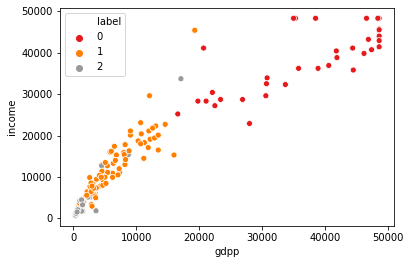

In [48]:
# plot the cluster using the scatter plot to find the distribution of clusters having hue as label column
sns.scatterplot(x='gdpp',y='income',hue='label', data = df_kmean, palette='Set1')

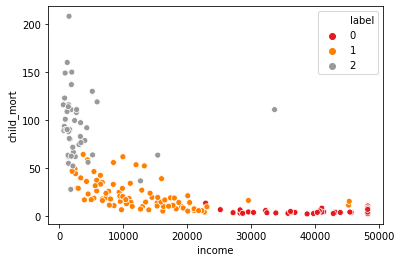

In [49]:
# plot the cluster using the scatter plot to find the distribution of clusters having hue as label column
sns.scatterplot(x='income',y='child_mort',hue='label', data = df_kmean, palette='Set1')

#### Cluster profiling

In [50]:
# Grouping the dataframe to check the means of the all clusters
features1=['child_mort','income','gdpp']
df_features1 = df_kmean[features1].groupby(df_kmean['label']).mean()
df_features1

child_mort        income          gdpp
label                                        
0        5.237838  38711.081081  37745.675676
1       22.735714  12388.571429   6353.023810
2       93.206522   3378.760870   1599.130435

As we can see the Cluster 2(label - 2) has `low gdpp`, `low income` and `high child mortality rate`

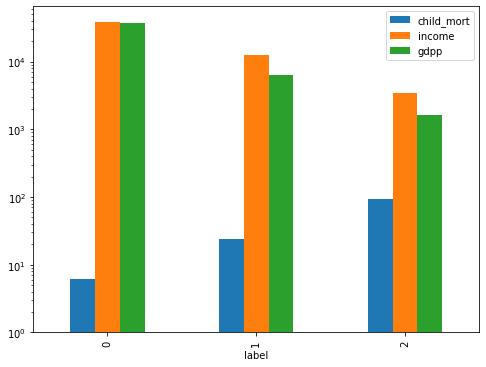

In [51]:
# plotting the bar plot of the 3 features
df_features1.plot(kind='bar',log=True,figsize=[8,6])

In [52]:
# checking the max value of child_mort feature from df_features1  
label_value = df_features1['child_mort'].idxmax()
label_value

2

In [53]:
# Filter the data for the clusters
df_kmean[df_kmean['label']==label_value]

country  child_mort     exports    health    imports  \
0                 Afghanistan        90.2     55.3000   41.9174    248.297   
3                      Angola       119.0   2199.1900  100.6050   1514.370   
17                      Benin       111.0    180.4040   31.0780    281.976   
25               Burkina Faso       116.0    110.4000   38.7550    170.200   
26                    Burundi        93.6     20.6052   26.7960     90.552   
28                   Cameroon       108.0    290.8200   67.2030    353.700   
31   Central African Republic       149.0     52.6280   17.7508    118.190   
32                       Chad       150.0    330.0960   40.6341    390.195   
36                    Comoros        88.2    126.8850   34.6819    397.573   
37           Congo, Dem. Rep.       116.0    137.2740   26.4194    165.664   
38                Congo, Rep.        63.9   2331.7400   67.4040   1498.780   
40              Cote d'Ivoire       111.0    617.3200   64.6600    528.260   
49          Equatorial Guinea       111.0  14671.8000  766.0800  10071.900   
50                    Eritrea        55.2     23.0878   12.8212    112.306   
55                      Gabon        63.7   5048.7500  306.2500   1653.750   
56                     Gambia        80.3    133.7560   31.9778    239.974   
59                      Ghana        74.7    386.4500   68.3820    601.290   
63                     Guinea       109.0    196.3440   31.9464    279.936   
64              Guinea-Bissau       114.0     81.5030   46.4950    192.544   
66                      Haiti       208.0    101.2860   45.7442    428.314   
72                       Iraq        36.9   1773.0000  378.4500   1534.500   
80                      Kenya        62.2    200.1690   45.9325    324.912   
81                   Kiribati        62.7    198.1700  168.3700   1190.510   
84                        Lao        78.9    403.5600   50.9580    562.020   
87                    Lesotho        99.7    460.9800  129.8700   1181.700   
88                    Liberia        89.3     62.4570   38.5860    302.802   
93                 Madagascar        62.2    103.2500   15.5701    177.590   
94                     Malawi        90.5    104.6520   30.2481    160.191   
97                       Mali       137.0    161.4240   35.2584    248.508   
99                 Mauritania        97.4    608.4000   52.9200    734.400   
106                Mozambique       101.0    131.9850   21.8299    193.578   
112                     Niger       123.0     77.2560   17.9568    170.868   
113                   Nigeria       130.0    589.4900  118.1310    405.420   
116                  Pakistan        92.1    140.4000   22.8800    201.760   
126                    Rwanda        63.6     67.5600   59.1150    168.900   
129                   Senegal        66.8    249.0000   56.6000    403.000   
132              Sierra Leone       160.0     67.0320   52.2690    137.655   
136           Solomon Islands        28.1    635.9700  110.2950   1047.480   
142                     Sudan        76.7    291.5600   93.5360    254.560   
146                Tajikistan        52.4    109.9620   44.1324    432.468   
147                  Tanzania        71.9    131.2740   42.1902    204.282   
149               Timor-Leste        62.6     79.2000  328.3200   1000.800   
150                      Togo        90.3    196.1760   37.3320    279.624   
155                    Uganda        81.0    101.7450   53.6095    170.170   
165                     Yemen        56.3    393.0000   67.8580    450.640   
166                    Zambia        83.1    540.2000   85.9940    451.140   

      income  inflation  life_expec  total_fer   gdpp  label  
0     1610.0      9.440        56.2     5.8200    553      2  
3     5900.0     20.870        60.1     6.1600   3530      2  
17    1820.0      0.885        61.8     5.3600    758      2  
25    1430.0      6.810        57.9     5.8700    575      2  
26     764.0     12.300        57.7     

In [54]:
# verifying the top 5 countries which are in direst need of AID
df_kmean[df_kmean['label']==label_value].sort_values(['gdpp','income','child_mort'],ascending=[True,True,False]).head(5)

country  child_mort   exports   health  imports  income  \
26            Burundi        93.6   20.6052  26.7960   90.552   764.0   
88            Liberia        89.3   62.4570  38.5860  302.802   700.0   
37   Congo, Dem. Rep.       116.0  137.2740  26.4194  165.664   609.0   
112             Niger       123.0   77.2560  17.9568  170.868   814.0   
132      Sierra Leone       160.0   67.0320  52.2690  137.655  1220.0   

     inflation  life_expec  total_fer  gdpp  label  
26       12.30        57.7     6.2600   231      2  
88        5.47        60.8     5.0200   327      2  
37       20.80        57.5     6.5400   334      2  
112       2.55        58.8     6.5636   348      2  
132      17.20        55.0     5.2000   399      2

As we can see from the above table top 5 countries with `high child mortality`, `low income` and `low gdpp`

#### Hierarchical clustering

In [55]:
# checking the head count of scaled dataframe
scaled_df.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.426485  0.001728  0.005873  0.010216  0.020994   0.544258    0.475345   
1    0.068160  0.036456  0.051490  0.081973  0.195487   0.346890    0.871795   
2    0.120253  0.054536  0.034955  0.057745  0.257776   0.809809    0.875740   
3    0.566699  0.070039  0.017720  0.062445  0.110967   1.000000    0.552268   
4    0.037488  0.176839  0.145914  0.296406  0.387806   0.225279    0.881657   

   total_fer      gdpp  
0   0.862642  0.006656  
1   0.092360  0.079766  
2   0.321413  0.087414  
3   0.925447  0.068191  
4   0.181026  0.247401

#### plotting linkages

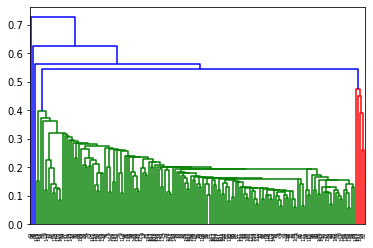

In [56]:
# Single linkage
mergings1 = linkage(scaled_df,method="single",metric='euclidean')
dendrogram(mergings1)
plt.show()

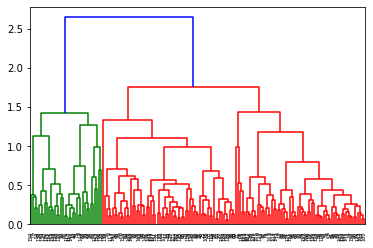

In [57]:
# Complete Linkage
mergings = linkage(scaled_df,method="complete",metric='euclidean')
dendrogram(mergings)
plt.show()

As we can see from the above 2 dendrograms, the `single linkage` is clumsy and not clear, whereas the `complete linkage` has a clear dendrogram compared to it, let us consider the clear dendrogram that is `complete linkage`

In [58]:
# As we have seen from the silhouette score and Elbow curve methos it is clear that we can consider the number of clusters =3 so we consider 3 clusters
cluster_labels = cut_tree(mergings,n_clusters=3).reshape(-1,)
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 0, 1, 1, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0,
       0, 1, 2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 2, 2, 2, 1, 1, 0, 1, 1, 0, 0])

In [59]:
# assign cluster labels
df_kmean['cluster_labels']=cluster_labels
df_kmean.head()

country  child_mort  exports    health   imports   income  \
0          Afghanistan        90.2    55.30   41.9174   248.297   1610.0   
1              Albania        16.6  1145.20  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.64  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.19  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer   gdpp  label  cluster_labels  
0       9.44        56.2       5.82    553      2               0  
1       4.49        76.3       1.65   4090      1               1  
2      16.10        76.5       2.89   4460      1               1  
3      20.87        60.1       6.16   3530      2               0  
4       1.44        76.8       2.13  12200      1               1

#### Visualise the clusters

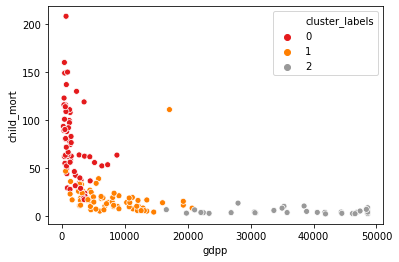

In [60]:
#Plotting the scatterplot for gdpp and child_mort with cluster_labels as hue 
sns.scatterplot(x='gdpp',y='child_mort',hue='cluster_labels', data = df_kmean, palette='Set1')

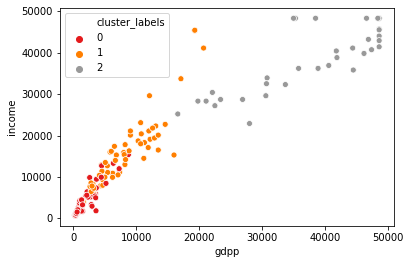

In [61]:
#Plotting the scatterplot for income and gdpp with cluster_labels as hue
sns.scatterplot(x='gdpp',y='income',hue='cluster_labels', data = df_kmean, palette='Set1')

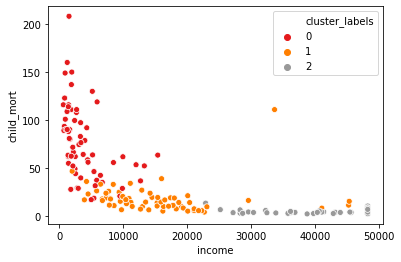

In [62]:
#Plotting the scatterplot for income and child_mort with cluster_labels as hue
sns.scatterplot(x='income',y='child_mort',hue='cluster_labels', data = df_kmean, palette='Set1')

#### Cluster profiling

In [63]:
# Grouping the dataframe to check the means of the all clusters
features1=['child_mort','income','gdpp']
df_features2 = df_kmean[features1].groupby(df_kmean['cluster_labels']).mean()
df_features2

child_mort        income          gdpp
cluster_labels                                        
0                76.080303   3858.075758   1809.121212
1                18.224615  15115.846154   7823.261538
2                 5.144444  38644.722222  38219.166667

As we see the mean values from the above table of the clusters, it is clear that `cluster (cluster_labels - 0)` has `high child mortality rate` with `less income` and `less gdpp`

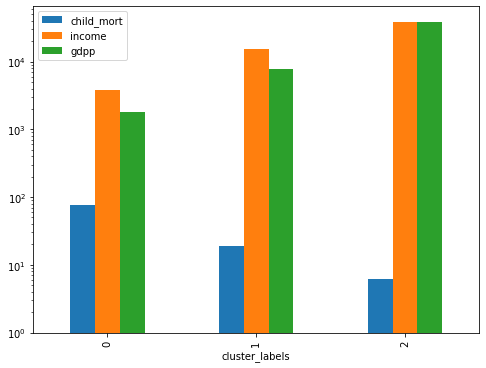

In [64]:
# plotting the bar plot of the 3 features
df_features2.plot(kind='bar',log=True,figsize=[8,6])

In [65]:
# checking the max value of child_mort feature from df_features2
Clusterlabel_val = df_features2['child_mort'].idxmax()
Clusterlabel_val

0

In [66]:
# verifying the top 5 countries in need of AID
df_kmean[df_kmean['cluster_labels']==Clusterlabel_val]

country  child_mort   exports    health   imports  income  \
0     Afghanistan        90.2    55.300   41.9174   248.297  1610.0   
3          Angola       119.0  2199.190  100.6050  1514.370  5900.0   
12     Bangladesh        49.4   121.280   26.6816   165.244  2440.0   
17          Benin       111.0   180.404   31.0780   281.976  1820.0   
18         Bhutan        42.7   926.500  113.3600  1541.260  6420.0   
..            ...         ...       ...       ...       ...     ...   
154  Turkmenistan        62.0  3387.720  111.0000  1975.800  9940.0   
155        Uganda        81.0   101.745   53.6095   170.170  1540.0   
162       Vanuatu        29.2  1384.020  155.9250  1565.190  2950.0   
165         Yemen        56.3   393.000   67.8580   450.640  4480.0   
166        Zambia        83.1   540.200   85.9940   451.140  3280.0   

     inflation  life_expec  total_fer  gdpp  label  cluster_labels  
0        9.440        56.2       5.82   553      2               0  
3       20.870        60.1       6.16  3530      2               0  
12       7.140        70.4       2.33   758      1               0  
17       0.885        61.8       5.36   758      2               0  
18       5.990        72.1       2.38  2180      1               0  
..         ...         ...        ...   ...    ...             ...  
154      2.310        67.9       2.83  4440      1               0  
155     10.600        56.8       6.15   595      2               0  
162      2.620        63.0       3.50  2970      1               0  
165     20.870        67.5       4.67  1310      2               0  
166     14.000        52.0       5.40  1460      2               0  

[66 rows x 12 columns]

In [67]:
#sorting and finding the top 5 countries which are in need of AID
df_kmean[df_kmean['cluster_labels']==Clusterlabel_val].sort_values(['gdpp','income','child_mort'],ascending=[True,True,False]).head(5)

country  child_mort   exports   health  imports  income  \
26            Burundi        93.6   20.6052  26.7960   90.552   764.0   
88            Liberia        89.3   62.4570  38.5860  302.802   700.0   
37   Congo, Dem. Rep.       116.0  137.2740  26.4194  165.664   609.0   
112             Niger       123.0   77.2560  17.9568  170.868   814.0   
132      Sierra Leone       160.0   67.0320  52.2690  137.655  1220.0   

     inflation  life_expec  total_fer  gdpp  label  cluster_labels  
26       12.30        57.7     6.2600   231      2               0  
88        5.47        60.8     5.0200   327      2               0  
37       20.80        57.5     6.5400   334      2               0  
112       2.55        58.8     6.5636   348      2               0  
132      17.20        55.0     5.2000   399      2               0

#### As from the above table we see that and can confirm the both kmeans and hiererchical clustering results the same countries as the top 5 which are in direst in need of aid
Country names:
- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone